<a href="https://colab.research.google.com/github/Akhilatho/Python-Project/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT - HDS - 2023**


This data set includes monthly counts and percentages of Medicaid and CHIP beneficiaries, by state, who received at least one service for each of the following conditions: acute bronchitis, acute respiratory distress, bronchitis not otherwise specified (NOS), COVID-19, influenza, lower or acute respiratory infection, pneumonia, respiratory infection NOS, and suspected COVID-19

The project aims to analyze and gain insights from the provided dataset, which includes monthly counts and percentages of Medicaid and CHIP beneficiaries across various states in the USA who received services for specific respiratory conditions.

The main dataset is collected from "data.gov."

The main goal of the project is to examine the following: 1) Before jumping to analyze the data, clean the data first by doing preprocessing on the data. 2) Combine the month name dataset with the postal code dataset to get a better idea of the beneficiaries. 3) How many total beneficiaries will the state have in December 2021 with state capital? 4) Compute the percentage of beneficiaries with acute bronchitis in each state in December 2021 with state capital. 5) Compute the number of beneficiaries with each respiratory condition in Missouri in December 2021. 6) Compute the state with the highest percentage of beneficiaries with a COVID-19 diagnosis in December 2021. 7) Observe the total beneficiaries in December 2021 across states. 8) Observe the trend of the total number of beneficiaries across months for a respiratory infection NOS in a Missouri state: 9) Plot the pie chart for the percentage distribution of beneficiaries across conditions in a Missouri state in December. 10) Plot the correlation graph among the columns of the final beneficiary dataset.

This project gives the idea to analyze the health care data, especially focusing on beneficiaries and their respiratory health conditions in the United States of America.

Import all the necessary modules before analyzing the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

Reading the csv file from the data.gov using pandas library read_csv method

In [2]:
beneficiaryData = pd.read_csv('https://download.medicaid.gov/data/Respiratory-Conditions-in-the-Medicaid-and-CHIP-Population.csv')
# Displaying the data using head method
beneficiaryData.head()

,State,Year,Month,Condition,BeneficiaryCount,PercentageOfBeneficiaries,DataQuality
0,Alabama,2018,201801,Acute bronchitis,"6,871",0.6,NaN
1,Alabama,2018,201801,Acute respiratory distress syndrome,249,0.0,NaN
2,Alabama,2018,201801,Bronchitis NOS,"2,301",0.2,NaN
3,Alabama,2018,201801,COVID-19 diagnosis,0,0.0,NaN
4,Alabama,2018,201801,Influenza,"37,848",3.1,NaN


**1. Preprocessing on the data.**

In [3]:
def preprocessingBenficiaryData(dataframe):
    """
    (dataframe) -> dataframe

    The function will take the dataframe as an argument and returns
    the dataframe after preprocessing data
    """

    dataframe['Month'] = dataframe['Month'].astype(str)
    dataframe['Month'] = dataframe['Month'].str[4:]
    dataframe = dataframe.drop('DataQuality', axis=1)
    dataframe.rename(columns = {'Month' : 'Month Number'}, inplace = True)
    dataframe['BeneficiaryCount'] = dataframe['BeneficiaryCount'].str.replace(',', '')
    dataframe['BeneficiaryCount'] = pd.to_numeric(dataframe['BeneficiaryCount'], errors='coerce')
    dataframe['PercentageOfBeneficiaries'] = pd.to_numeric(dataframe['PercentageOfBeneficiaries'], errors='coerce')
    dataframe = dataframe.fillna(0)
    return dataframe

In [4]:
beneficiaryData = preprocessingBenficiaryData(beneficiaryData)
#Displaying the data using head method
beneficiaryData['Month Number'] = beneficiaryData['Month Number'].astype(int)
beneficiaryData.head()

,State,Year,Month Number,Condition,BeneficiaryCount,PercentageOfBeneficiaries
0,Alabama,2018,1,Acute bronchitis,6871.0,0.6
1,Alabama,2018,1,Acute respiratory distress syndrome,249.0,0.0
2,Alabama,2018,1,Bronchitis NOS,2301.0,0.2
3,Alabama,2018,1,COVID-19 diagnosis,0.0,0.0
4,Alabama,2018,1,Influenza,37848.0,3.1


In [5]:
# Gives the number of rows and columns
beneficiaryData.shape

(22896, 6)

In [6]:
# Gives the data type of columns
beneficiaryData.dtypes

State                         object
Year                           int64
Month Number                   int64
Condition                     object
BeneficiaryCount             float64
PercentageOfBeneficiaries    float64
dtype: object

In [7]:
monthData = pd.read_html('https://www.mathsisfun.com/measure/months.html')
monthData = monthData[0]
# Display the data
monthData.head()

,Month Number,Month,In 3 letters,Days in Month
0,1,January,Jan,31
1,2,February,Feb,28 (29 in leap years)
2,3,March,Mar,31
3,4,April,Apr,30
4,5,May,May,31


In [8]:
# Gives the data type of columns
monthData.dtypes

Month Number      int64
Month            object
In 3 letters     object
Days in Month    object
dtype: object

**2. Merging the MonthData dataframe and main beneficiaryData dataframe**

In [9]:
# Merging the dataframes
beneficiaryDataMerge = pd.merge(beneficiaryData, monthData[['Month Number', 'Month']], on='Month Number', how='left')

In [10]:
# Display the data
beneficiaryDataMerge.head()

,State,Year,Month Number,Condition,BeneficiaryCount,PercentageOfBeneficiaries,Month
0,Alabama,2018,1,Acute bronchitis,6871.0,0.6,January
1,Alabama,2018,1,Acute respiratory distress syndrome,249.0,0.0,January
2,Alabama,2018,1,Bronchitis NOS,2301.0,0.2,January
3,Alabama,2018,1,COVID-19 diagnosis,0.0,0.0,January
4,Alabama,2018,1,Influenza,37848.0,3.1,January


In [11]:
# Gives the number of rows and columns
beneficiaryDataMerge.shape

(22896, 7)

Gets the data from the codigo postal using read_html about the state information and their zip code range

In [12]:
# Get the data from the national website about State related content using pandas libray read_html
pc = pd.read_html('https://codigo-postal.co/en-us/usa/')
postalCodes = pc[0]
postalCodes.head()

,Unnamed: 0,Unnamed: 1,State,State Capital,ZIP Range,ZIP Quantity,State founded
0,NaN,AL,Alabama,Montgomery,35004 to 36925,838,"December 14, 1819"
1,NaN,AK,Alaska,Juneau,99501 to 99950,274,"January 3, 1959"
2,NaN,AZ,Arizona,Phoenix,85001 to 86556,567,"February 14, 1912"
3,NaN,AR,Arkansas,Little Rock,71601 to 72959,709,"June 15, 1836"
4,NaN,CA,California,Sacramento,90001 to 96162,2653,"September 9, 1850"


**1. Preprocessing on the data.**

In [13]:
def preprocessDta(dataframe):
    """
    (dataframe) -> dataframe


    The function preprocessDta is going to take dataframe and drops dumy data
    and rename the columns and return the dataframe
    """
    dataframe = dataframe.drop(columns = ['Unnamed: 0', 'State founded'], axis=1)
    dataframe = dataframe.rename(columns = {'Unnamed: 1': 'Postal Code'})
    return dataframe

In [14]:
postalCodes = preprocessDta(postalCodes)
# Display the data
postalCodes.head()

,Postal Code,State,State Capital,ZIP Range,ZIP Quantity
0,AL,Alabama,Montgomery,35004 to 36925,838
1,AK,Alaska,Juneau,99501 to 99950,274
2,AZ,Arizona,Phoenix,85001 to 86556,567
3,AR,Arkansas,Little Rock,71601 to 72959,709
4,CA,California,Sacramento,90001 to 96162,2653


**2. Merge the postalCodes dataframe with the actual beneficiaryDataFrame to get more idea about the state and their zipcodes range**

In [15]:
# It will do left join using two dataframe
beneficiaryLastDataMerge = pd.merge(beneficiaryDataMerge, postalCodes, on='State', how='left')
# Display the data
beneficiaryLastDataMerge.head()

,State,Year,Month Number,Condition,BeneficiaryCount,PercentageOfBeneficiaries,Month,Postal Code,State Capital,ZIP Range,ZIP Quantity
0,Alabama,2018,1,Acute bronchitis,6871.0,0.6,January,AL,Montgomery,35004 to 36925,838.0
1,Alabama,2018,1,Acute respiratory distress syndrome,249.0,0.0,January,AL,Montgomery,35004 to 36925,838.0
2,Alabama,2018,1,Bronchitis NOS,2301.0,0.2,January,AL,Montgomery,35004 to 36925,838.0
3,Alabama,2018,1,COVID-19 diagnosis,0.0,0.0,January,AL,Montgomery,35004 to 36925,838.0
4,Alabama,2018,1,Influenza,37848.0,3.1,January,AL,Montgomery,35004 to 36925,838.0


In [16]:
# Gets the number of rows and columns
beneficiaryLastDataMerge.shape

(22896, 11)

In [17]:
# Gives mean, std, minimum, maximum, 25 percentile, 75 percentile from the data
beneficiaryLastDataMerge.describe()

,Year,Month Number,BeneficiaryCount,PercentageOfBeneficiaries,ZIP Quantity
count,22896.000000,22896.000000,22896.000000,22896.000000,21600.000000
mean,2019.500000,6.500000,3672.521183,0.221615,827.320000
std,1.118058,3.452128,11723.991468,0.442163,594.630665
min,2018.000000,1.000000,0.000000,0.000000,91.000000
25%,2018.750000,3.750000,42.000000,0.000000,407.000000
50%,2019.500000,6.500000,356.000000,0.000000,717.000000
75%,2020.250000,9.250000,2447.250000,0.200000,1031.000000
max,2021.000000,12.000000,257869.000000,4.600000,2655.000000


**3. The Total beneficiaries by state in january 2018 with State capital**

In [18]:
def totalBeneficiaryByState(dataframe):
    """
    (dataframe)->Series

    The function which is going to get one parameter named dataframe and produces output Series by computing
    total beneficiaries by state in Decmeber 2021
    """
    beneficiary_By_State = dataframe[(dataframe['Year'] == 2021) & (dataframe['Month'] == 'December')].groupby(['State', 'State Capital'])['BeneficiaryCount'].sum()
    return beneficiary_By_State

In [19]:
print("The Total Beneficiaries by State in December 2021 is ", totalBeneficiaryByState(beneficiaryLastDataMerge))

The Total Beneficiaries by State in December 2021 is  State           State Capital 
Alabama         Montgomery         54363.0
Alaska          Juneau              4011.0
Arizona         Phoenix            68613.0
Arkansas        Little Rock        26565.0
California      Sacramento        292922.0
Colorado        Denver             46275.0
Connecticut     Hartford           50939.0
Delaware        Dover              10328.0
Florida         Tallahassee       175137.0
Georgia         Atlanta           101093.0
Hawaii          Honolulu            8128.0
Idaho           Boise              11866.0
Illinois        Springfield       113111.0
Indiana         Indianapolis       63764.0
Iowa            Des Moines         40556.0
Kansas          Topeka             19340.0
Kentucky        Frankfort          83227.0
Louisiana       Baton Rouge       109486.0
Maine           Augusta             9832.0
Maryland        Annapolis          77319.0
Massachusetts   Boston             71391.0
Michigan    

In [20]:
def plotingTotalB(dataframe):
    """
    (dataframe)->None

    The function which is going to get one parameter named dataframe and plots the bargraph
    """
    # Ploting the graph for above to diplay the total beneficiaries by state in Decemeber 2021
    beneficiary_data = totalBeneficiaryByState(beneficiaryLastDataMerge)
    df_beneficiary = beneficiary_data.reset_index()
    df_beneficiary.columns = ['State', 'Total Beneficiaries', 'x']
    plt.figure(figsize=(12, 8))
    plt.bar(df_beneficiary['State'], df_beneficiary['x'], color='skyblue')
    plt.xlabel('Total Beneficiaries')
    plt.title('Total Beneficiaries by State in December 2021')
    plt.xticks(rotation=45, ha='right')
    plt.show()

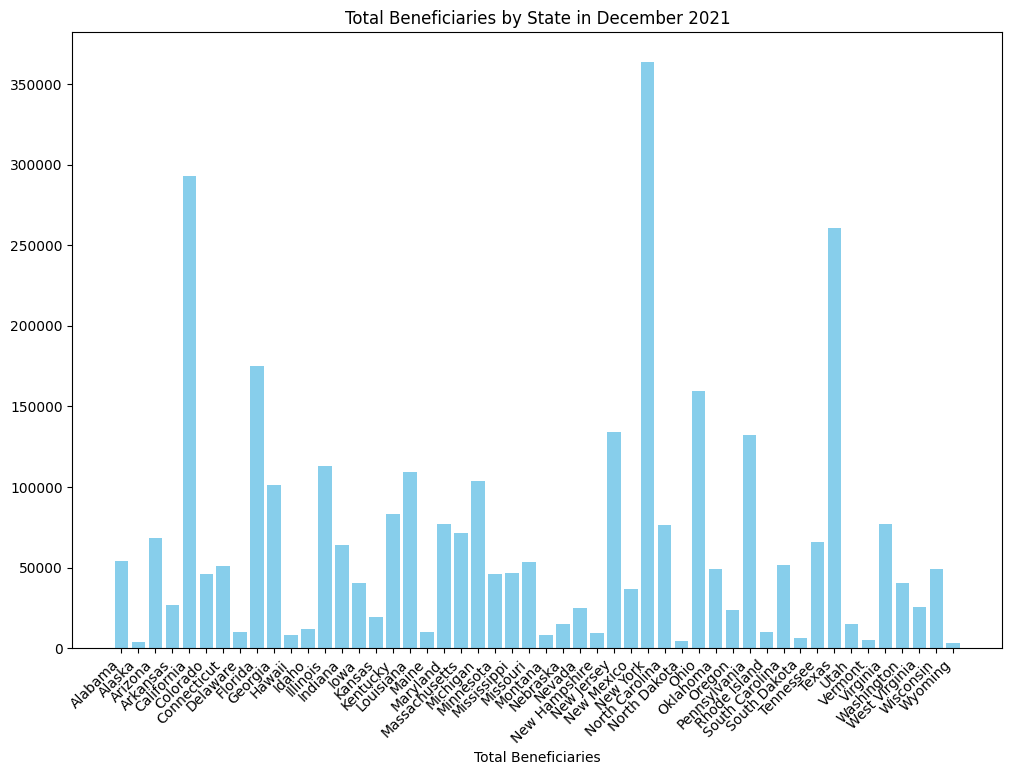

In [21]:
plotingTotalB(beneficiaryLastDataMerge)

**4. Percentage of beneficiaries with acute bronchitis in each state in December 2021 with state capital city.**

In [22]:
def getPercOfBenef(dataframe):
    """
    (dataframe)->Series

    The function which is going to get one parameter named dataframe and produces output Series by computing
    percentage of beneficiaries with acute bronchitis in each state in Decemeber 2021
    """
    acute_bronchitis_pct_by_state = dataframe[(dataframe['Year'] == 2021) & (dataframe['Condition'] == 'Acute bronchitis') & ((dataframe['Month'] == 'December'))].groupby(['State', 'State Capital'])['PercentageOfBeneficiaries'].mean()
    return acute_bronchitis_pct_by_state

In [23]:
print("The percentage of beneficiaries with acute bronchitis in each state in Decemeber 2021 with State captial city : ", getPercOfBenef(beneficiaryLastDataMerge))

The percentage of beneficiaries with acute bronchitis in each state in Decemeber 2021 with State captial city :  State           State Capital 
Alabama         Montgomery        0.3
Alaska          Juneau            0.0
Arizona         Phoenix           0.1
Arkansas        Little Rock       0.2
California      Sacramento        0.1
Colorado        Denver            0.1
Connecticut     Hartford          0.1
Delaware        Dover             0.2
Florida         Tallahassee       0.2
Georgia         Atlanta           0.2
Hawaii          Honolulu          0.0
Idaho           Boise             0.2
Illinois        Springfield       0.1
Indiana         Indianapolis      0.1
Iowa            Des Moines        0.2
Kansas          Topeka            0.2
Kentucky        Frankfort         0.4
Louisiana       Baton Rouge       0.4
Maine           Augusta           0.1
Maryland        Annapolis         0.1
Massachusetts   Boston            0.1
Michigan        Lansing           0.1
Minnesota       Sain

**5. Compute the number of beneficiaries with each respiratory condition in Missouri in December 2021.**

In [24]:
def getBenfEachRespCond(dataframe):
    """
    (dataframe)->Series

    The function which is going to get one parameter named dataframe and produces output Series by computing
    the number of beneficiaries with each respiratory condition in Missouri in December 2021
    """
    mO = dataframe[(dataframe['State'] == 'Missouri') & (dataframe['Year'] == 2021) & (dataframe['Month'] == 'December')]
    condition_counts = mO.groupby('Condition')['BeneficiaryCount'].sum()
    return condition_counts

In [25]:
print("the number of beneficiaries with each respiratory condition in Missouri in December 2021.", getBenfEachRespCond(beneficiaryLastDataMerge))

the number of beneficiaries with each respiratory condition in Missouri in December 2021. Condition
Acute bronchitis                         2745.0
Acute respiratory distress syndrome       306.0
Bronchitis NOS                           1517.0
COVID-19 diagnosis                      15592.0
Influenza                                4730.0
Lower or acute respiratory infection      250.0
Pneumonia                                3637.0
Respiratory infection NOS               24401.0
Suspected COVID-19 diagnosis               37.0
Name: BeneficiaryCount, dtype: float64


**6. Compute the state with the highest percentage of beneficiaries with COVID-19 diagnosis in December 2021.**

In [26]:
def getHighBeneficiaries(dataframe):
    """
    (dataframe)->String

    The function which is going to get one parameter named dataframe and produces output String by computing
    the state with the highest percentage of beneficiaries with COVID-19 diagnosis in December 2021.
    """
    covid = dataframe[(dataframe['Condition'] == 'COVID-19 diagnosis') & (dataframe['Year'] == 2021) & (dataframe['Month'] == 'December')].groupby('State')['PercentageOfBeneficiaries'].max()
    return covid.idxmax()

In [27]:
print("the state with the highest percentage of beneficiaries with COVID-19 diagnosis in December 2021 : ", getHighBeneficiaries(beneficiaryLastDataMerge))

the state with the highest percentage of beneficiaries with COVID-19 diagnosis in December 2021 :  District of Columbia


**7. Total Beneficiaries in December 2021 Across States.**

In [28]:
def plotingTotalBen(dataframe):
    """
    (dataframe)->None

    The function which is going to get one parameter named dataframe and plots the bargraph
    """
    jan = dataframe[(dataframe['Year'] == 2021) & (dataframe['Month Number'] == 12)]
    total_beneficiaries_by_state = jan.groupby('State')['BeneficiaryCount'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sbn.barplot(x='State', y='BeneficiaryCount', data=jan.groupby('State')['BeneficiaryCount'].sum().reset_index())
    plt.title('Total Beneficiaries in December 2021 Across States')
    plt.xlabel('State')
    plt.ylabel('Total Beneficiaries')
    plt.xticks(rotation=45, ha='right')
    plt.show()

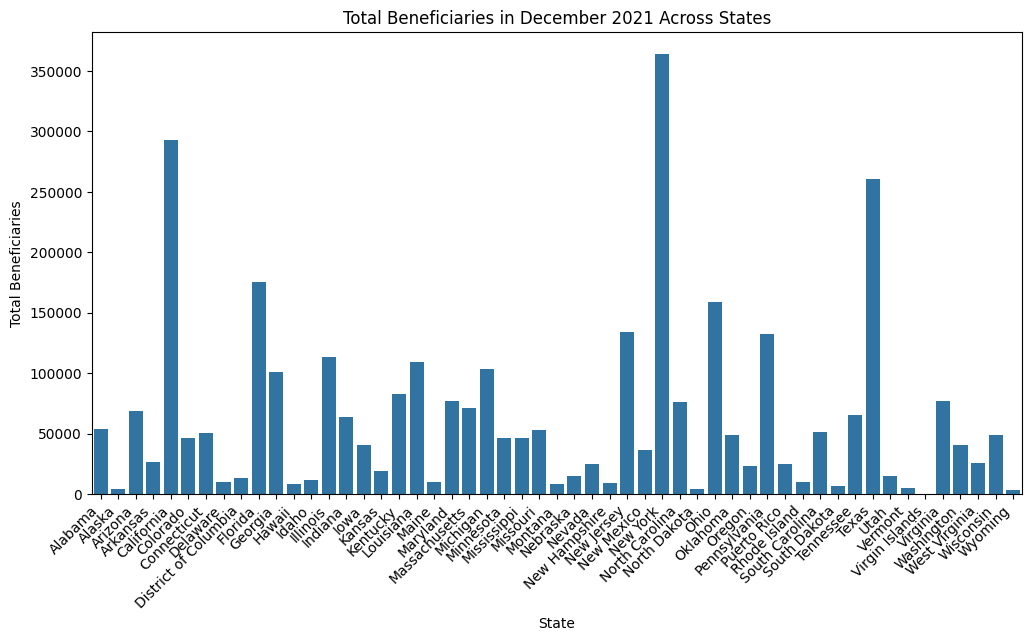

In [29]:
plotingTotalBen(beneficiaryLastDataMerge)
# We can observe both datasets are same when we observe the images from 3rd question and from here

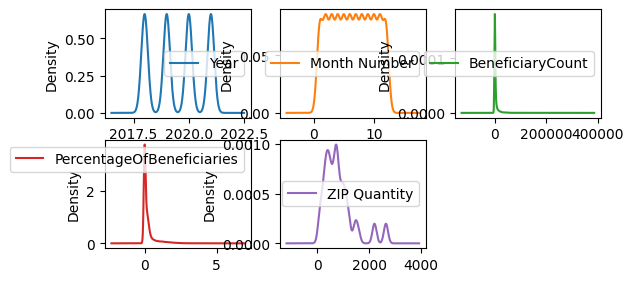

In [30]:
# Plots the density plot to get the idea about how each numberical attribute is in the dataset
beneficiaryLastDataMerge.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

**8.Trend of the total number of beneficiaries across months for a Respiratory infection NOS in a Missouri state.**

In [31]:
def plotingGraph(dataframe):
    """
    (dataframe)->None

    The function which is going to get one parameter named dataframe and plots the
    trend of the total number of beneficiaries across months for a Respiratory infection NOS in a Missouri state:
    """
    condition_data = dataframe[(dataframe['State'] == 'Missouri') & (dataframe['Condition'] == 'Respiratory infection NOS')]
    plt.figure(figsize=(12, 6))
    sbn.lineplot(x='Month', y='BeneficiaryCount', data=condition_data, marker='o', errorbar=None)
    plt.title('Trend of Beneficiaries for Respiratory infection NOS in Missouri')
    plt.xlabel('Month')
    plt.ylabel('Total Beneficiaries')
    plt.show()

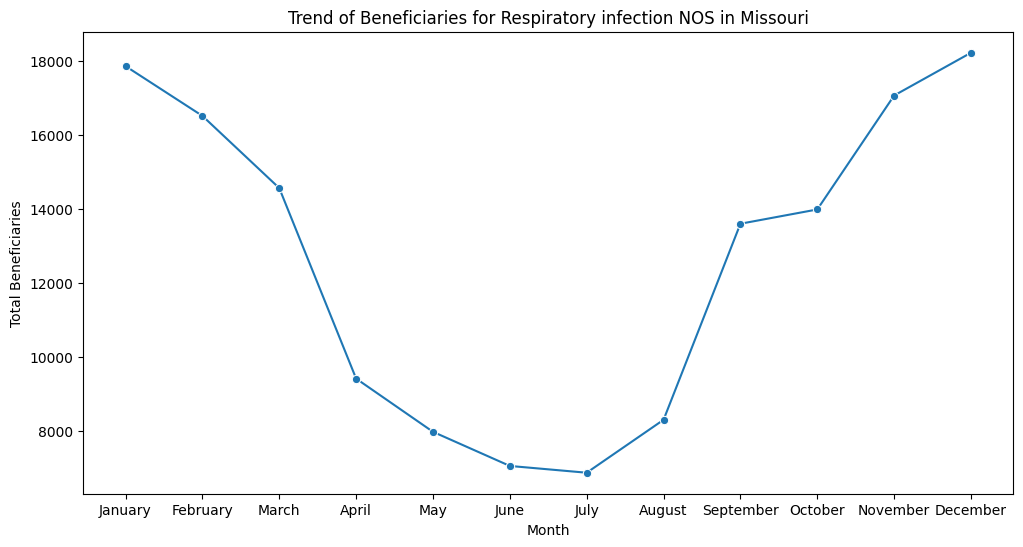

In [32]:
plotingGraph(beneficiaryLastDataMerge)

**9. Plot the Pie chart for the percentage distribution of beneficiaries across conditions in a Missouri state on december month**

In [33]:
def plotingDistribn(dataframe):
    """
    (dataframe)->None

    The function which is going to get one parameter named dataframe and plots the
    Pie chart for the percentage distribution of beneficiaries across conditions
    in a Missouri state on december month
    """
    ress = dataframe[(dataframe['State'] == 'Missouri') & (dataframe['Month'] == 'December')]
    plt.figure(figsize=(8, 8))
    plt.pie(ress['PercentageOfBeneficiaries'], labels=ress['Condition'], autopct='%1.1f%%', startangle=90)
    plt.title('Percentage Distribution of Beneficiaries Across Conditions in Missouri, ')
    plt.show()

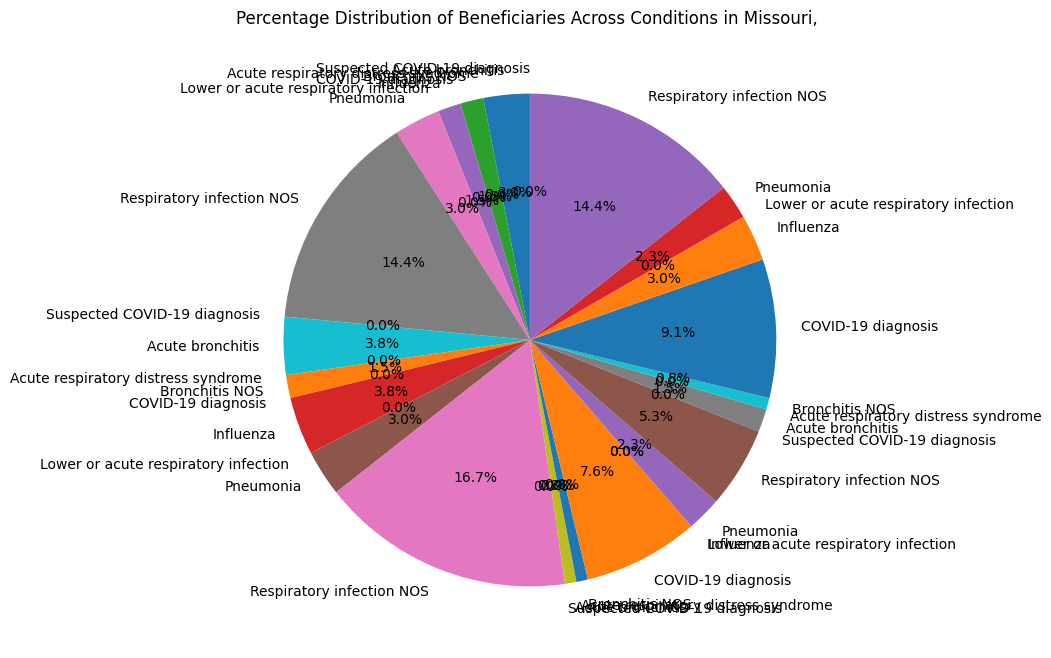

In [34]:
plotingDistribn(beneficiaryLastDataMerge)

**10. Plots the correlation graph among the columns of the final beneficiary dataset.**

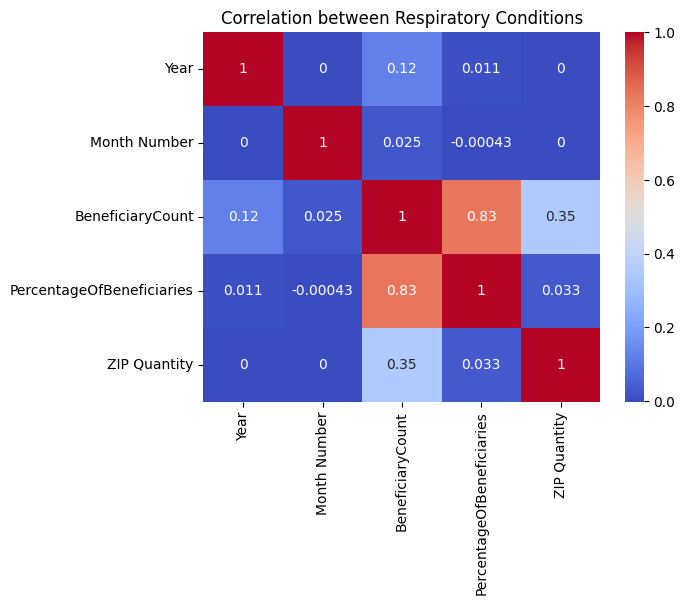

In [35]:
corr = beneficiaryLastDataMerge.corr(method='spearman', numeric_only=True)
sbn.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Respiratory Conditions")
plt.show()

**CONCLUSION**

The incidence and trends of various respiratory disorders in different states are shown by this analysis of respiratory health data for Medicaid and CHIP members in the United States. The pre-processing and data cleaning procedures made sure the data was correct and prepared for analysis. The integration of beneficiary data with postal code and month details for a more thorough comprehension of the demographic and geographic characteristics linked to respiratory health.

**Among the analysis's main conclusions are:**

**Total beneficiaries:** As of December 2021, the total beneficiaries varied by state, with Wyoming having the fewest (3,239) and California having the most (292,922).

**Acute bronchitis:** Alaska and Hawaii had the lowest percentage of beneficiaries (0%), while Kentucky had the highest rate (0.4%) in December 2021.

**Missouri - December 2021:** The state had a heterogeneous beneficiary distribution with respect to respiratory disorders. Specifically, "Respiratory infection NOS" accounted for the largest number of beneficiaries (24,401), while "Acute respiratory distress syndrome" had the lowest number (306).

**COVID-19:** In December 2021, the District of Columbia had the largest proportion of beneficiaries with a COVID-19 diagnosis among all states.

**Trends:** Beneficiaries in Missouri who had a "Respiratory infection NOS" showed seasonal variations, with a larger number throughout the winter.

In order to address the differences in respiratory health among various states and demographic groups, these findings emphasize the necessity of focused interventions and public health campaigns. To find the reasons behind these differences and create efficient preventative and treatment plans, more study is necessary.

The investigation also shows how crucial it is to clean up, preprocess, and integrate data in order to extract insightful information from healthcare data. Pie charts, heatmaps, and bar charts are examples of data visualization approaches that were used to effectively communicate the analysis's findings.

All things considered, this initiative offers a useful beginning point for additional study and examination of respiratory health statistics in the US. We can better understand the factors influencing respiratory health and create practical plans to enhance the health and wellbeing of Medicaid and CHIP recipients by investigating and analyzing this data further.

**Among the analysis's main conclusions are:**

**Total beneficiaries:** As of December 2021, the total beneficiaries varied by state, with Wyoming having the fewest (3,239) and California having the most (292,922).

**Acute bronchitis:** Alaska and Hawaii had the lowest percentage of beneficiaries (0%), while Kentucky had the highest rate (0.4%) in December 2021.

**Missouri - December 2021:** The state had a heterogeneous beneficiary distribution with respect to respiratory disorders. Specifically, "Respiratory infection NOS" accounted for the largest number of beneficiaries (24,401), while "Acute respiratory distress syndrome" had the lowest number (306).

**COVID-19:** In December 2021, the District of Columbia had the largest proportion of beneficiaries with a COVID-19 diagnosis among all states.

**Trends:** Beneficiaries in Missouri who had a "Respiratory infection NOS" showed seasonal variations, with a larger number throughout the winter.

In order to address the differences in respiratory health among various states and demographic groups, these findings emphasize the necessity of focused interventions and public health campaigns. To find the reasons behind these differences and create efficient preventative and treatment plans, more study is necessary.

The investigation also shows how crucial it is to clean up, preprocess, and integrate data in order to extract insightful information from healthcare data. Pie charts, heatmaps, and bar charts are examples of data visualization approaches that were used to effectively communicate the analysis's findings.

In the end, the present initiative offers a significant foundation for further investigation and examination of respiratory health information in the US. We can improve the health and wellbeing of Medicaid and CHIP recipients by going deeper into the factors impacting respiratory health and by developing practical solutions through further exploration and analysis of this data.